In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/BAJAJFINSV.csv")

In [4]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3201 non-null   object 
 1   Symbol              3201 non-null   object 
 2   Series              3201 non-null   object 
 3   Prev Close          3201 non-null   float64
 4   Open                3201 non-null   float64
 5   High                3201 non-null   float64
 6   Low                 3201 non-null   float64
 7   Last                3201 non-null   float64
 8   Close               3201 non-null   float64
 9   VWAP                3201 non-null   float64
 10  Volume              3201 non-null   int64  
 11  Turnover            3201 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3201 non-null   int64  
 14  %Deliverble         3201 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 375.2

In [6]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03,3.201000e+03,2456.000000,3.201000e+03,3201.000000
mean,2755.864386,2760.382381,2803.614449,2716.731443,2758.781537,2758.657451,2761.156954,2.315312e+05,9.533424e+13,20892.811075,7.409510e+04,0.471614
std,2869.811765,2874.814173,2912.885262,2834.037357,2873.792614,2873.522615,2874.033545,4.402681e+05,2.176448e+14,32396.302068,1.464012e+05,0.218910
min,90.750000,88.150000,93.100000,88.150000,91.000000,90.750000,89.260000,4.570000e+02,1.376712e+10,149.000000,4.560000e+02,0.056200
25%,527.900000,528.600000,542.600000,520.000000,527.950000,527.900000,531.270000,3.981100e+04,2.751053e+12,2951.750000,2.086300e+04,0.287400
50%,1098.700000,1095.000000,1118.000000,1080.250000,1100.000000,1098.700000,1103.560000,9.995300e+04,1.090486e+13,9450.000000,4.159700e+04,0.469700
75%,5121.900000,5120.000000,5199.800000,5042.800000,5115.000000,5125.100000,5127.510000,2.315400e+05,8.755946e+13,24439.750000,8.308900e+04,0.636000
max,11176.550000,11000.000000,11300.000000,10868.700000,11175.450000,11176.550000,11081.780000,6.271671e+06,3.394379e+15,312959.000000,3.804696e+06,1.000000


In [7]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [8]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [9]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [10]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [11]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [12]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [13]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
3196,2.250005,0.097578,10001.75,419596,NaN
3197,1.688962,0.913500,10091.35,342847,NaN
3198,4.578792,2.836275,10489.30,1113881,NaN
3199,7.414449,6.039374,11176.55,1696498,NaN
3200,3.278221,0.378636,11041.65,835355,NaN


In [14]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [15]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [16]:
#Define the prediction model
model = RandomForestRegressor()

In [17]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9591502198406686


In [19]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [20]:
predictions = model.predict(X_Check)

In [21]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

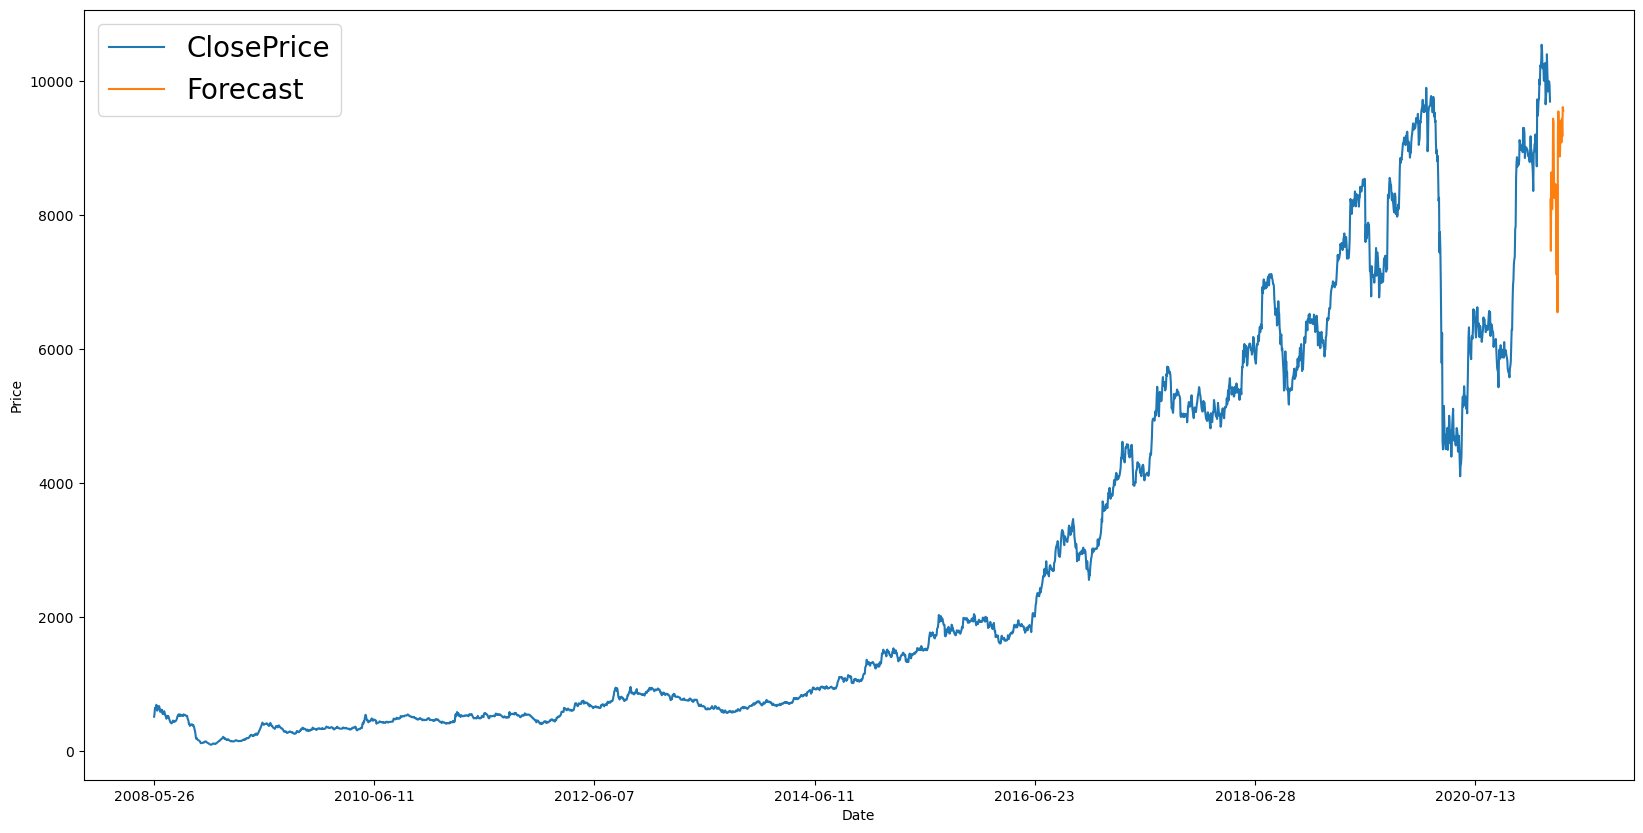

In [22]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')